## Сюй Минчуань, гр. 517, задание 7 домашки 2
- Генерировать графа модели Бакли-Остгуса при $n=5000, m=2, a=0.27$
- Оптимизировать реализацию генерации при $n=10000, m=5, a=0.27$ (за минуту)

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import numpy as np
from datetime import datetime

In [2]:
# the optimized version of generation
def generateSimpleBuckleyOsthusGraph(n, a):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    prob = [a + 1] # degrees[0] = 2, degrees[0] + a - 1 = a + 1
    while G.number_of_nodes() < n:
        new_node = G.number_of_nodes()
        G.add_node(new_node)
        prob.append(a)
        prob_norm = np.array(prob) / ((a+1)*(new_node+1)-1)  
        destination = np.random.choice(new_node+1, p = prob_norm)
        prob[destination] += 1
        G.add_edge(new_node, destination)
    return G

def generateBuckleyOsthusGraph(n, m, a):
    G1mn = generateSimpleBuckleyOsthusGraph(m * n, a)
    G = nx.MultiDiGraph()
    for u, v in G1mn.edges():
        u_new, v_new = u // m, v // m
        G.add_edge(u_new, v_new)
    return G

In [3]:
G = generateBuckleyOsthusGraph(5000, 2, 0.27)

In [4]:
print(G.number_of_nodes(), G.number_of_edges())

5000 10000


### Make the figure of power law

In [5]:
from math import gamma
def beta_func(a,b):
    return gamma(a) * gamma(b) / gamma(a+b)
def theory_power_law(a, m ,d):
    return beta_func(d-m+m*a, a+2) / beta_func(m*a, a+1)

Text(0.5, 1.0, 'Power law of BuckleyOsthus')

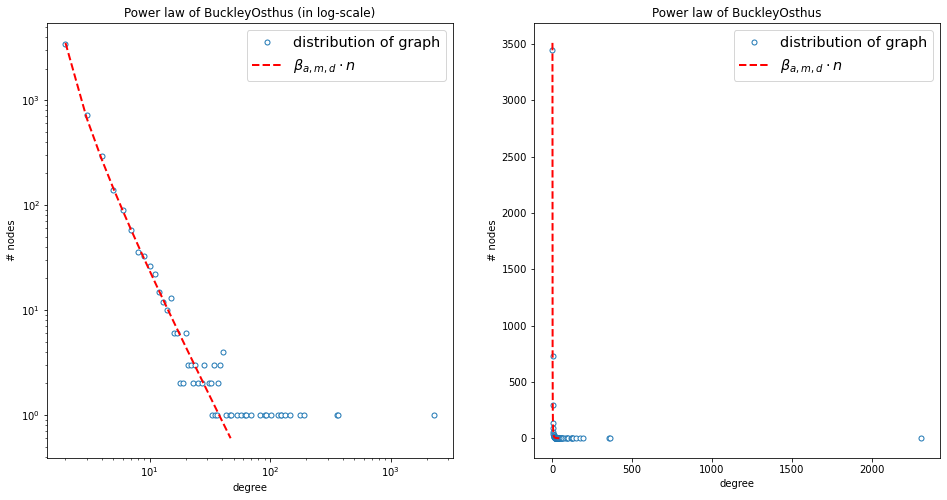

In [6]:
n = 5000
a = 0.27
m = 2
degrees = defaultdict(int)

for v in G.nodes():
    d = G.degree(v)
    degrees[d] += 1

x = sorted(degrees.keys())
y = [degrees[d] for d in x]
x_theo = np.array(x)
x_theo = x_theo[x_theo <=50]
y_theo = [theory_power_law(a, m, d) * 5000 for d in x_theo]
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.loglog(x, y, ls = 'None', marker = 'o', markersize = 5, markerfacecolor = 'white', label = "distribution of graph")
plt.loglog(x_theo, y_theo, 'r--',linewidth = 2, label = r"$\beta_{a,m,d}\cdot n$")
plt.ylabel("# nodes")
plt.xlabel("degree")
plt.legend(fontsize = "x-large")
plt.title("Power law of BuckleyOsthus (in log-scale)")

plt.subplot(122)
plt.plot(x, y, ls = 'None', marker = 'o', markersize = 5, markerfacecolor = 'white', label = "distribution of graph")
plt.plot(x_theo, y_theo, 'r--',linewidth = 2, label = r"$\beta_{a,m,d}\cdot n$")
plt.ylabel("# nodes")
plt.xlabel("degree")
plt.legend(fontsize = "x-large")
plt.title("Power law of BuckleyOsthus")

### Generate bigger model and optimize
- Удалил 'degrees' для сохранения чисел вершин определенных степеней. 
- В каждой итерации завоно вероятности всех вершин не вычисляются.  

В итоге получилось сгенерировать модель с $n=10000, m=5, a=0.27$ за минуту.

In [7]:
t1 = datetime.now()
G = generateBuckleyOsthusGraph(10000, 5, 0.27)
d_time = datetime.now() - t1
run_time = (d_time).seconds + (d_time).microseconds / 1e6

print("# nodes: {}, # edges: {}, time: {}".format(G.number_of_nodes(), G.number_of_edges(), run_time))

# nodes: 10000, # edges: 50000, time: 49.428071
